In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
%%R

# Read data
df <- read_csv('epochtimes.csv')
df

Rows: 12 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): epochtimes
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 12 × 2
    year epochtimes
   <dbl> <chr>     
 1  2022 518,904   
 2  2021 30,082,498
 3  2020 4,870,746 
 4  2019 2,098,762 
 5  2018 692,093   
 6  2017 $757,718  
 7  2016 -$128,495 
 8  2015 -$582,202 
 9  2014 -$796,325 
10  2013 -$745,370 
11  2012 -$436,899 
12  2011 -$202,656 


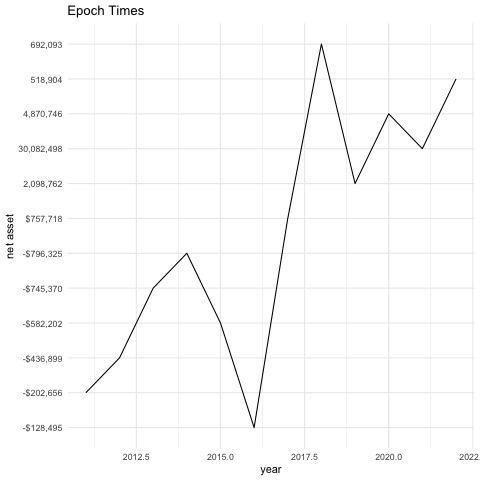

In [7]:
%%R

# line chart
ggplot(df) +
  aes(x = year, y = epochtimes, group=1)+
  geom_line() +
  labs(title = "Epoch Times", x = "year", y = "net asset") +
  theme_minimal()
